# Regularization: A Tool for Better Machine Learning

![](https://th.bing.com/th/id/OIP.Jsx0mW-JIGzYUQ5HuCy6HQAAAA?rs=1&pid=ImgDetMain)

**Regularization is a crucial technique in machine learning that helps to prevent overfitting. Overfitting occurs when a model becomes too complex and learns the training data so well that it fails to generalize to new, unseen data. This can lead to poor performance on real-world applications.**   

### How does regularization work?

**By introducing a penalty term to the loss function, regularization discourages models from becoming overly complex. This penalty term is calculated based on the magnitude of the model's parameters.**   

### Common Regularization Techniques:

- **L1 Regularization (Lasso):** This technique encourages sparsity, meaning many model parameters are driven to zero. This can be useful for feature selection, as it can help identify the most important features.   
- **L2 Regularization (Ridge):** L2 regularization prevents individual parameters from becoming too large, which can help to reduce the variance of the model.   
- **Elastic Net:** This is a combination of L1 and L2 regularization, which can be useful when both feature selection and reducing variance are important.  

### When to Use Regularization:

- **Limited Training Data:** When you have limited training data, regularization can help prevent overfitting by preventing the model from memorizing the training set.

- **High-Dimensional Data:** With many features, regularization can help to prevent overfitting by reducing the complexity of the model.

- **Preventing Overfitting:** Regularization is a general technique for preventing overfitting in various machine learning models. 

### Key Benefits of Regularization:

- **Improved Generalization:** Regularization helps models generalize better to unseen data.   
- **Reduced Overfitting:** It prevents models from becoming too complex and memorizing the training data.   
- **Feature Selection:** L1 regularization can be used for feature selection.   
- **Enhanced Model Stability:** Regularization can make models more stable and less sensitive to small changes in the data.

*By understanding regularization and applying it appropriately, you can significantly improve the performance and reliability of your machine learning models.*

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv("/kaggle/input/salesdata/train.csv")
df_test = pd.read_csv("/kaggle/input/salesdata/test.csv")
print("Training Data: \n")
display(df_train.head(2))
print("Testing Data: \n")
df_test.head(2)

Training Data: 



,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,ExterQual_TA,Foundation_PConc,KitchenQual_TA
0,6,1969,1969,663,663,1352,1,7,1,299,158000,1,0,1
1,6,1920,1950,1012,1012,1012,1,6,1,308,118400,1,0,1


Testing Data: 



,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,ExterQual_TA,Foundation_PConc,KitchenQual_TA
0,4,1961,1961,1029,1029,1029,1,5,1,261,118500,1,0,1
1,5,1921,1950,731,820,1343,1,7,1,186,154900,1,0,1


In [3]:
df_test.shape

(329, 14)

In [4]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

X_train = df_train[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
                    'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
                    'ExterQual_TA', 'Foundation_PConc', 'KitchenQual_TA']]

y_train = df_train['SalePrice']

X_test = df_test[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
                    'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
                    'ExterQual_TA', 'Foundation_PConc', 'KitchenQual_TA']]

y_test = df_test['SalePrice']


# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Unregularized': LinearRegression(),
    'L1 (Lasso)': Lasso(alpha=1.0),
    'L2 (Ridge)': Ridge(alpha=1.0),
    'Elastic Net': ElasticNet(alpha=1.0, l1_ratio=0.5)  
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = model.score(X_test_scaled, y_test)
    results[name] = {'model': model, 'mse': mse, 'r2': r2}

print("Model Results:")
color_map = plt.cm.tab20  
colors = color_map(np.arange(len(results)) % color_map.N)  

for i, (name, result) in enumerate(results.items()):
    print(f"\033[1m{name}:\033[0m")  
    print(f"  MSE: {result['mse']:.4f}")
    print(f"  R2 Score: {result['r2']:.4f}")
    print(f"  Coefficients:")

Model Results:
Unregularized:
  MSE: 1101336094.4360
  R2 Score: 0.7980
  Coefficients:
L1 (Lasso):
  MSE: 1101343139.1702
  R2 Score: 0.7980
  Coefficients:
L2 (Ridge):
  MSE: 1101358746.2137
  R2 Score: 0.7980
  Coefficients:
Elastic Net:
  MSE: 1200548075.3716
  R2 Score: 0.7798
  Coefficients:


## Key Observations:

- **Similar R2 Scores:** All four models exhibit very similar R2 scores (around 0.7980), indicating that they explain a significant portion of the variance in the target variable.
- **Slightly Higher MSE for Elastic Net:** The Elastic Net model has a slightly higher MSE compared to the other three models. This suggests that it might be introducing some bias to the model, potentially due to its regularization penalty.
- **Minimal Impact of Regularization:** The differences in MSE between the regularized models (L1, L2, and Elastic Net) and the unregularized model are relatively small. This could be due to the nature of the data or the chosen regularization parameters.

## Conclusions:

- **Model Choice:** While the R2 scores are comparable, the slightly lower MSE of the unregularized model might make it a preferred choice if overfitting is not a major concern. However, if there's a risk of overfitting, the regularized models (L1, L2, or Elastic Net) could be considered.
- **Regularization Impact:** In this case, the regularization techniques (L1, L2, and Elastic Net) did not significantly improve the model's performance. This could be due to various factors, such as the data characteristics or the choice of regularization parameters.
- **Further Analysis:** To gain a deeper understanding of the models' behavior, it would be helpful to examine the feature coefficients and explore the impact of different regularization parameters.

## Additional Considerations:

- **Data Quality:** Ensure that the data is clean and free from outliers or missing values.
- **Feature Engineering:** Experiment with different feature engineering techniques to see if they can improve model performance.
- **Hyperparameter Tuning:** Fine-tune the regularization parameters (alpha and l1_ratio for Elastic Net) to potentially optimize the models' performance.
- **Cross-Validation:** Use cross-validation to assess the models' generalization performance more reliably.

**Note: By carefully considering these factors, we can make an informed decision about the best model for our specific problem.**

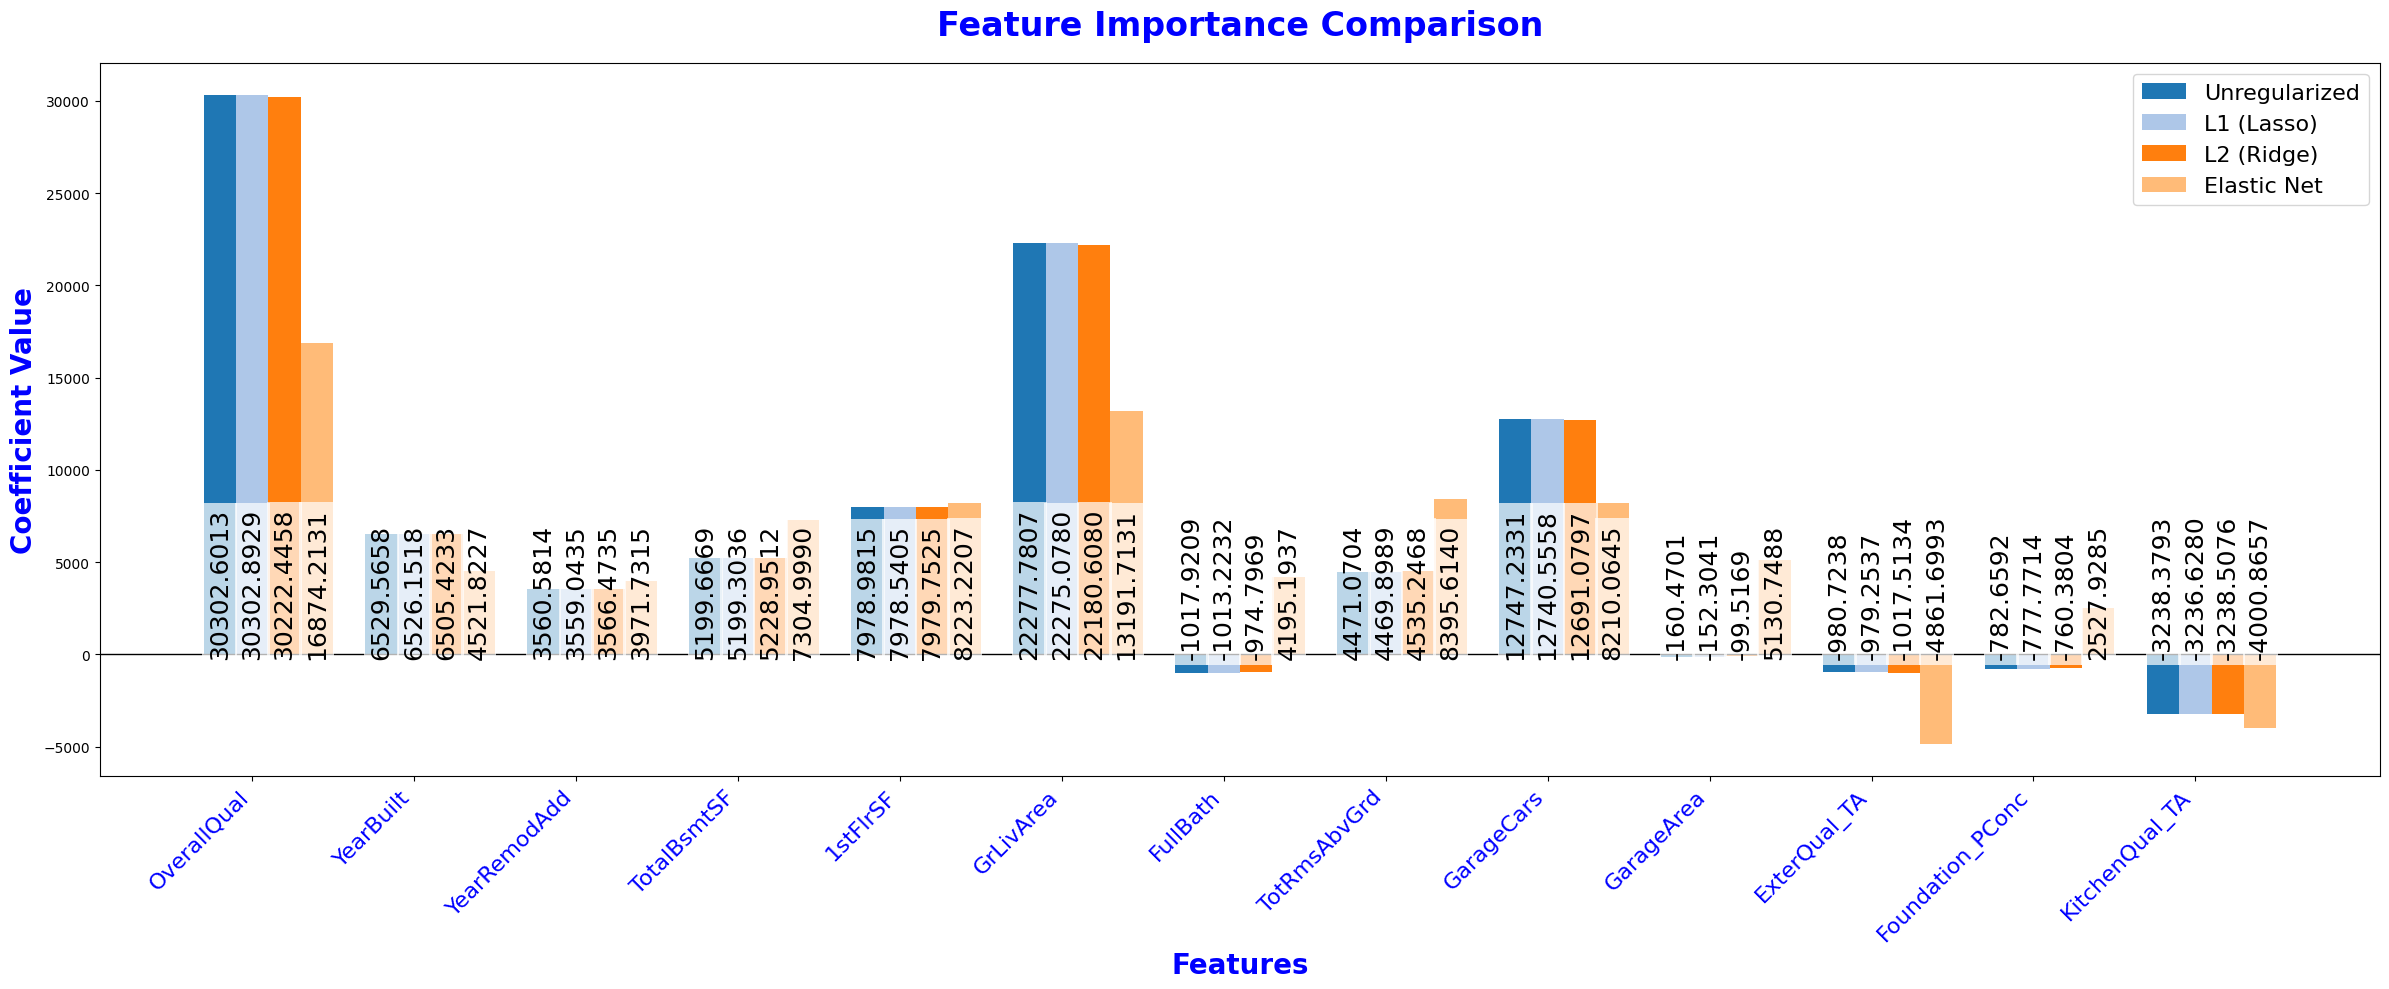

In [5]:
plt.figure(figsize=(24, 10))

x = np.arange(len(X_train.columns))  
width = 0.20  # Bar width

cmap = plt.cm.get_cmap('tab20')  
colors = cmap(np.arange(len(results)) % cmap.N)  

for i, (name, result) in enumerate(results.items()):
    coef = result['model'].coef_.ravel() 
    
    bars = plt.bar(x + i * width, coef, width, label=name, color=colors[i])
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, 0,
                 f"{height:.4f}", ha='center', va='baseline', 
                 rotation=90, fontsize=18, color='Black',
                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)) 

plt.axhline(y=0, color='k', linestyle='-', linewidth= 1) 
plt.xlabel('Features', fontsize=20, color='Blue', fontweight='bold')
plt.ylabel('Coefficient Value', fontsize=20, color='Blue', fontweight='bold')
plt.title('Feature Importance Comparison', fontsize=24, color='Blue', fontweight='bold', pad=20)
plt.xticks(x + width, X_train.columns, fontsize=16, color='Blue', rotation=45, ha='right') 
plt.legend(fontsize=16)
plt.tight_layout()
plt.show()

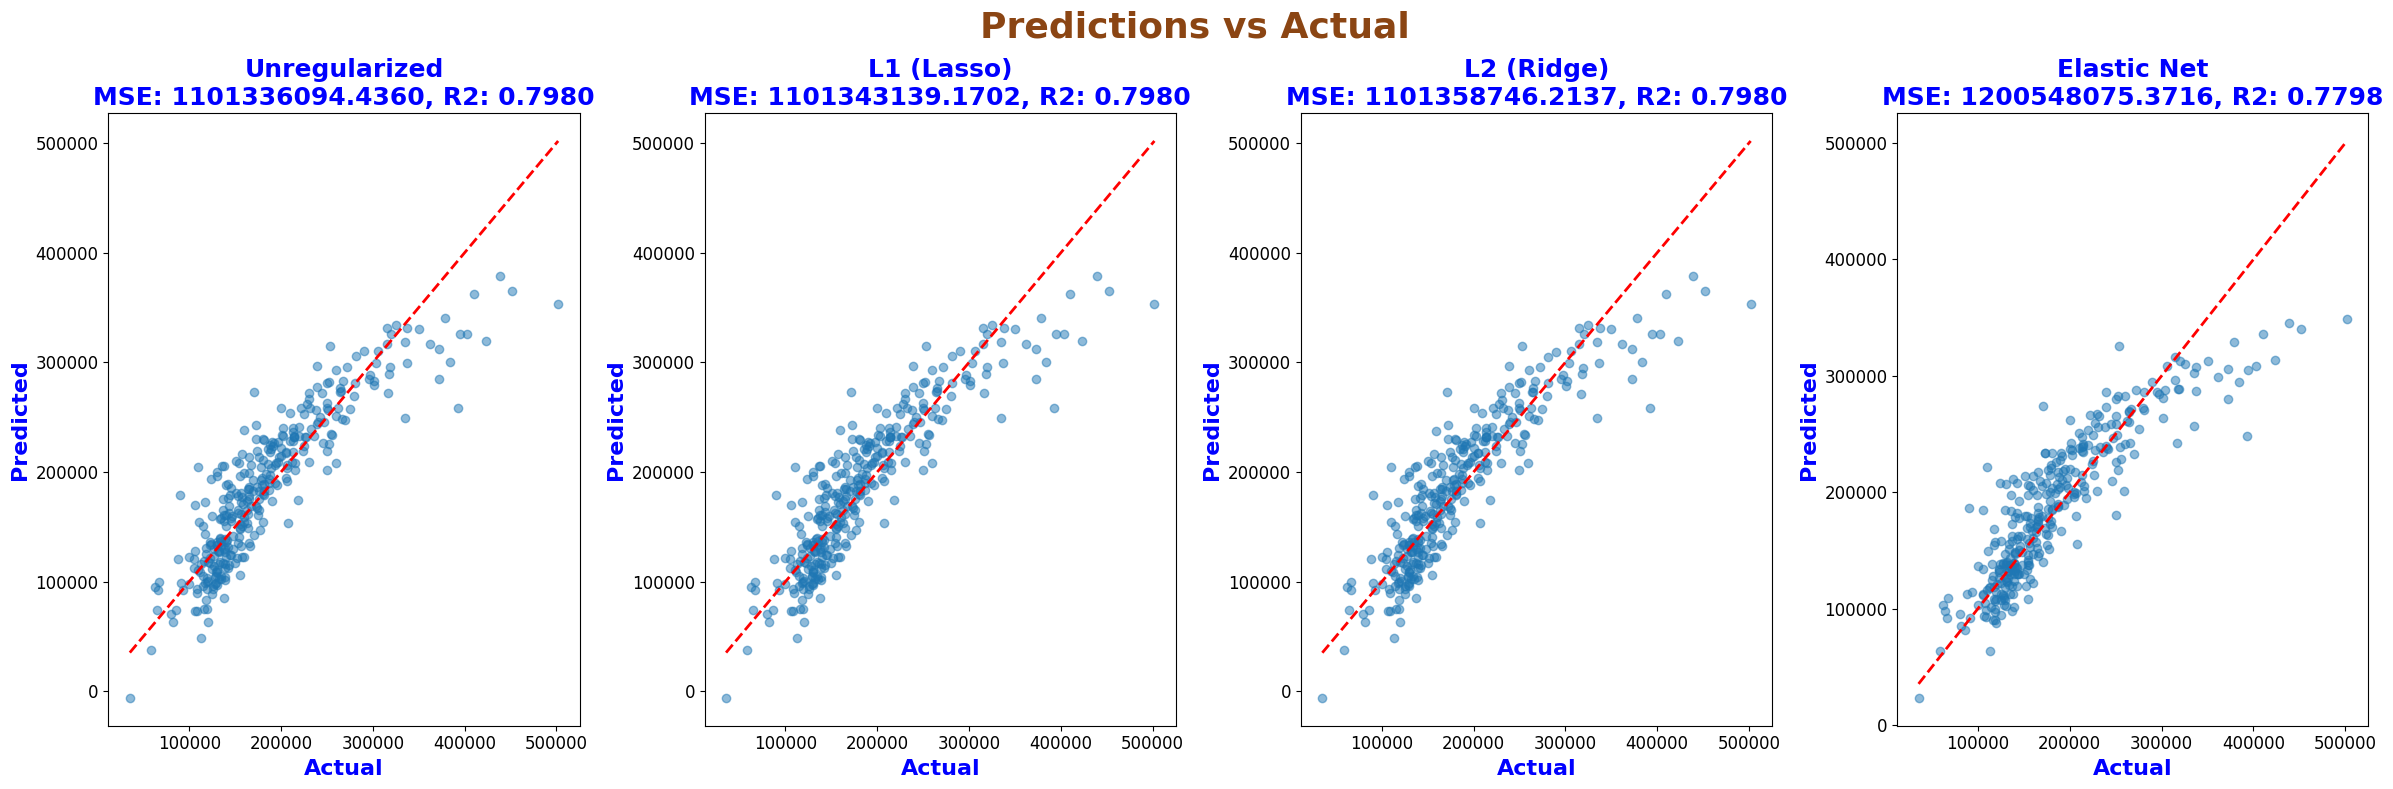

In [6]:
# Plot predictions vs actual for each model
fig, axes = plt.subplots(1, 4, figsize=(24, 8))
fig.suptitle('Predictions vs Actual', fontsize=26, color='#8B4513', fontweight='bold')

for ax, (name, result) in zip(axes, results.items()):
    model = result['model']
    y_pred = model.predict(X_test_scaled)
    ax.scatter(y_test, y_pred, alpha=0.5)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    ax.set_xlabel('Actual', fontsize=16, color='Blue', fontweight='bold')
    ax.set_ylabel('Predicted', fontsize=16, color='Blue', fontweight='bold')
    ax.set_title(f'{name}\nMSE: {result["mse"]:.4f}, R2: {result["r2"]:.4f}', fontsize=18, color='Blue', fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

## Predictions vs Actual Graph

**The graph compares the predicted values from four regression models (Unregularized, L1 (Lasso), L2 (Ridge), and Elastic Net) against the actual values. Each subplot represents a different model. The x-axis shows the actual values, while the y-axis shows the predicted values.** 

**Key Observations:**

- **Strong Positive Correlation:** All four models exhibit a strong positive correlation between predicted and actual values. This indicates that the models are able to capture the underlying relationship in the data to a reasonable extent.
- **Similar Scatter Patterns:** The scatter plots for all four models look quite similar, suggesting that the different regularization techniques did not significantly alter the overall prediction patterns.
- **Diagonal Line:** The dashed diagonal line represents perfect prediction, where the predicted values would exactly match the actual values. The closer the points are to this line, the better the model's predictions.
- **MSE and R2 Scores:** The provided metrics (MSE and R2) support the visual observations:

    - **MSE (Mean Squared Error):** Measures the average squared difference between predicted and actual values. Lower MSE indicates better prediction accuracy.
    - **R2 Score:** Measures the proportion of variance in the target variable explained by the model. Higher R2 indicates a better fit.
    - The relatively high R2 scores (around 0.7980) for all models confirm their good predictive power.
    
**Reasons for Similar Performance:**

- **Data Characteristics:** The underlying data might have a relatively linear relationship between the features and the target variable, making it easier for all models to capture the pattern.
- **Regularization Strength:** The chosen regularization parameters (alpha for L1, L2, and Elastic Net) might not be strong enough to significantly differentiate the models' performance.
- **Model Complexity:** The models might be relatively simple, and the regularization techniques might not be adding much complexity or constraint.

**To gain deeper insights, consider the following:**

- **Feature Importance:** Analyze the feature coefficients to understand which features are most influential in the models' predictions.
- **Hyperparameter Tuning:** Experiment with different regularization parameters to see if it can improve performance.
- **Cross-Validation:** Use cross-validation to assess the models' generalization performance more reliably.
- **Model Complexity:** Try more complex models (e.g., non-linear models, ensemble methods) if the data is highly nonlinear.

*By carefully analyzing these factors, we can gain a better understanding of the models' strengths and weaknesses and make informed decisions for our specific problem.*

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Assume df_train and df_test are your training and test DataFrames
X_train = df_train[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
                    'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
                    'ExterQual_TA', 'Foundation_PConc', 'KitchenQual_TA']]
y_train = df_train['SalePrice']
X_test = df_test[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
                    'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
                    'ExterQual_TA', 'Foundation_PConc', 'KitchenQual_TA']]
y_test = df_test['SalePrice']

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models and their parameter grids
models = {
    'Unregularized': (LinearRegression(), {}),
    'L1 (Lasso)': (Lasso(), {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}),
    'L2 (Ridge)': (Ridge(), {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}),
    'Elastic Net': (ElasticNet(), {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]})
}

results = {}

for name, (model, param_grid) in models.items():
    if param_grid:  # If there are hyperparameters to tune
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
    else:
        best_model = model
        best_model.fit(X_train_scaled, y_train)
        best_params = {}
    
    y_pred = best_model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'model': best_model, 'mse': mse, 'r2': r2, 'best_params': best_params}

# Print results
print("Model Results:")
color_map = plt.cm.tab20
colors = color_map(np.arange(len(results)) % color_map.N)

for i, (name, result) in enumerate(results.items()):
    print(f"\033[1m{name}:\033[0m")
    print(f"  MSE: {result['mse']:.4f}")
    print(f"  R2 Score: {result['r2']:.4f}")
    if result['best_params']:
        print(f"  Best Parameters: {result['best_params']}")
    print("  Coefficients:")
    for feature, coef in zip(X_train.columns, result['model'].coef_):
        print(f"    {feature}: {coef:.4f}")
    print()

Model Results:
Unregularized:
  MSE: 1101336094.4360
  R2 Score: 0.7980
  Coefficients:
    OverallQual: 30302.6013
    YearBuilt: 6529.5658
    YearRemodAdd: 3560.5814
    TotalBsmtSF: 5199.6669
    1stFlrSF: 7978.9815
    GrLivArea: 22277.7807
    FullBath: -1017.9209
    TotRmsAbvGrd: 4471.0704
    GarageCars: 12747.2331
    GarageArea: -160.4701
    ExterQual_TA: -980.7238
    Foundation_PConc: -782.6592
    KitchenQual_TA: -3238.3793

L1 (Lasso):
  MSE: 1101367531.2049
  R2 Score: 0.7980
  Best Parameters: {'alpha': 5.0}
  Coefficients:
    OverallQual: 30304.6742
    YearBuilt: 6512.1724
    YearRemodAdd: 3553.5329
    TotalBsmtSF: 5201.1843
    1stFlrSF: 7974.0482
    GrLivArea: 22263.8330
    FullBath: -994.3052
    TotRmsAbvGrd: 4465.6362
    GarageCars: 12714.1825
    GarageArea: -120.0299
    ExterQual_TA: -972.6826
    Foundation_PConc: -758.6943
    KitchenQual_TA: -3229.4819

L2 (Ridge):
  MSE: 1101561963.3566
  R2 Score: 0.7980
  Best Parameters: {'alpha': 5.0}
  Coeffic

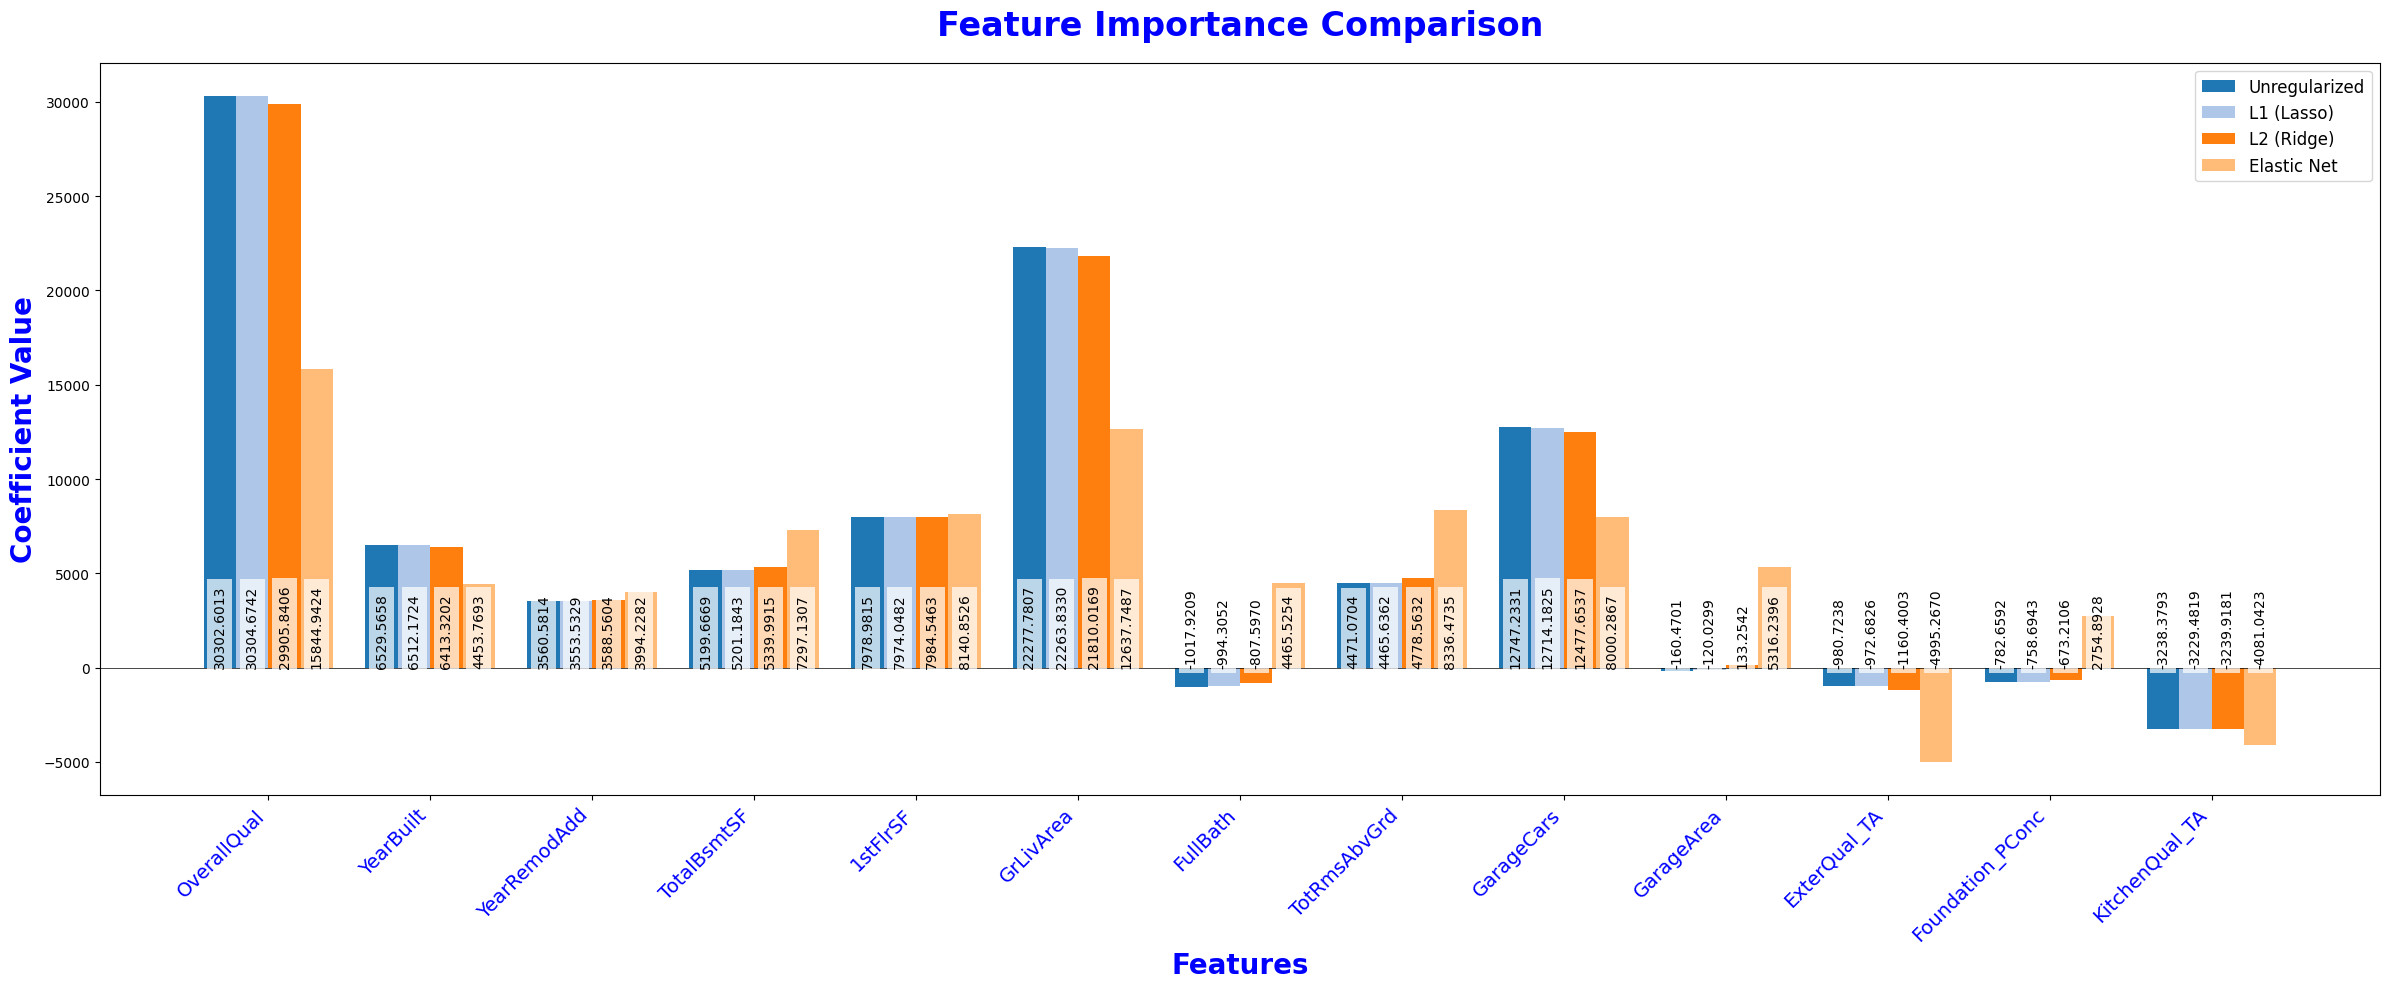

In [8]:
# Plot feature importance
plt.figure(figsize=(24, 10))
x = np.arange(len(X_train.columns))
width = 0.2

for i, (name, result) in enumerate(results.items()):
    coef = result['model'].coef_
    bars = plt.bar(x + i * width, coef, width, label=name, color=colors[i])
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, 0,
                 f"{height:.4f}", ha='center', va='bottom', 
                 rotation=90, fontsize=10, color='black',
                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.xlabel('Features', fontsize=20, color='Blue', fontweight='bold')
plt.ylabel('Coefficient Value', fontsize=20, color='Blue', fontweight='bold')
plt.title('Feature Importance Comparison', fontsize=24, color='Blue', fontweight='bold', pad=20)
plt.xticks(x + width * 1.5, X_train.columns, fontsize=14, color='Blue', rotation=45, ha='right')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

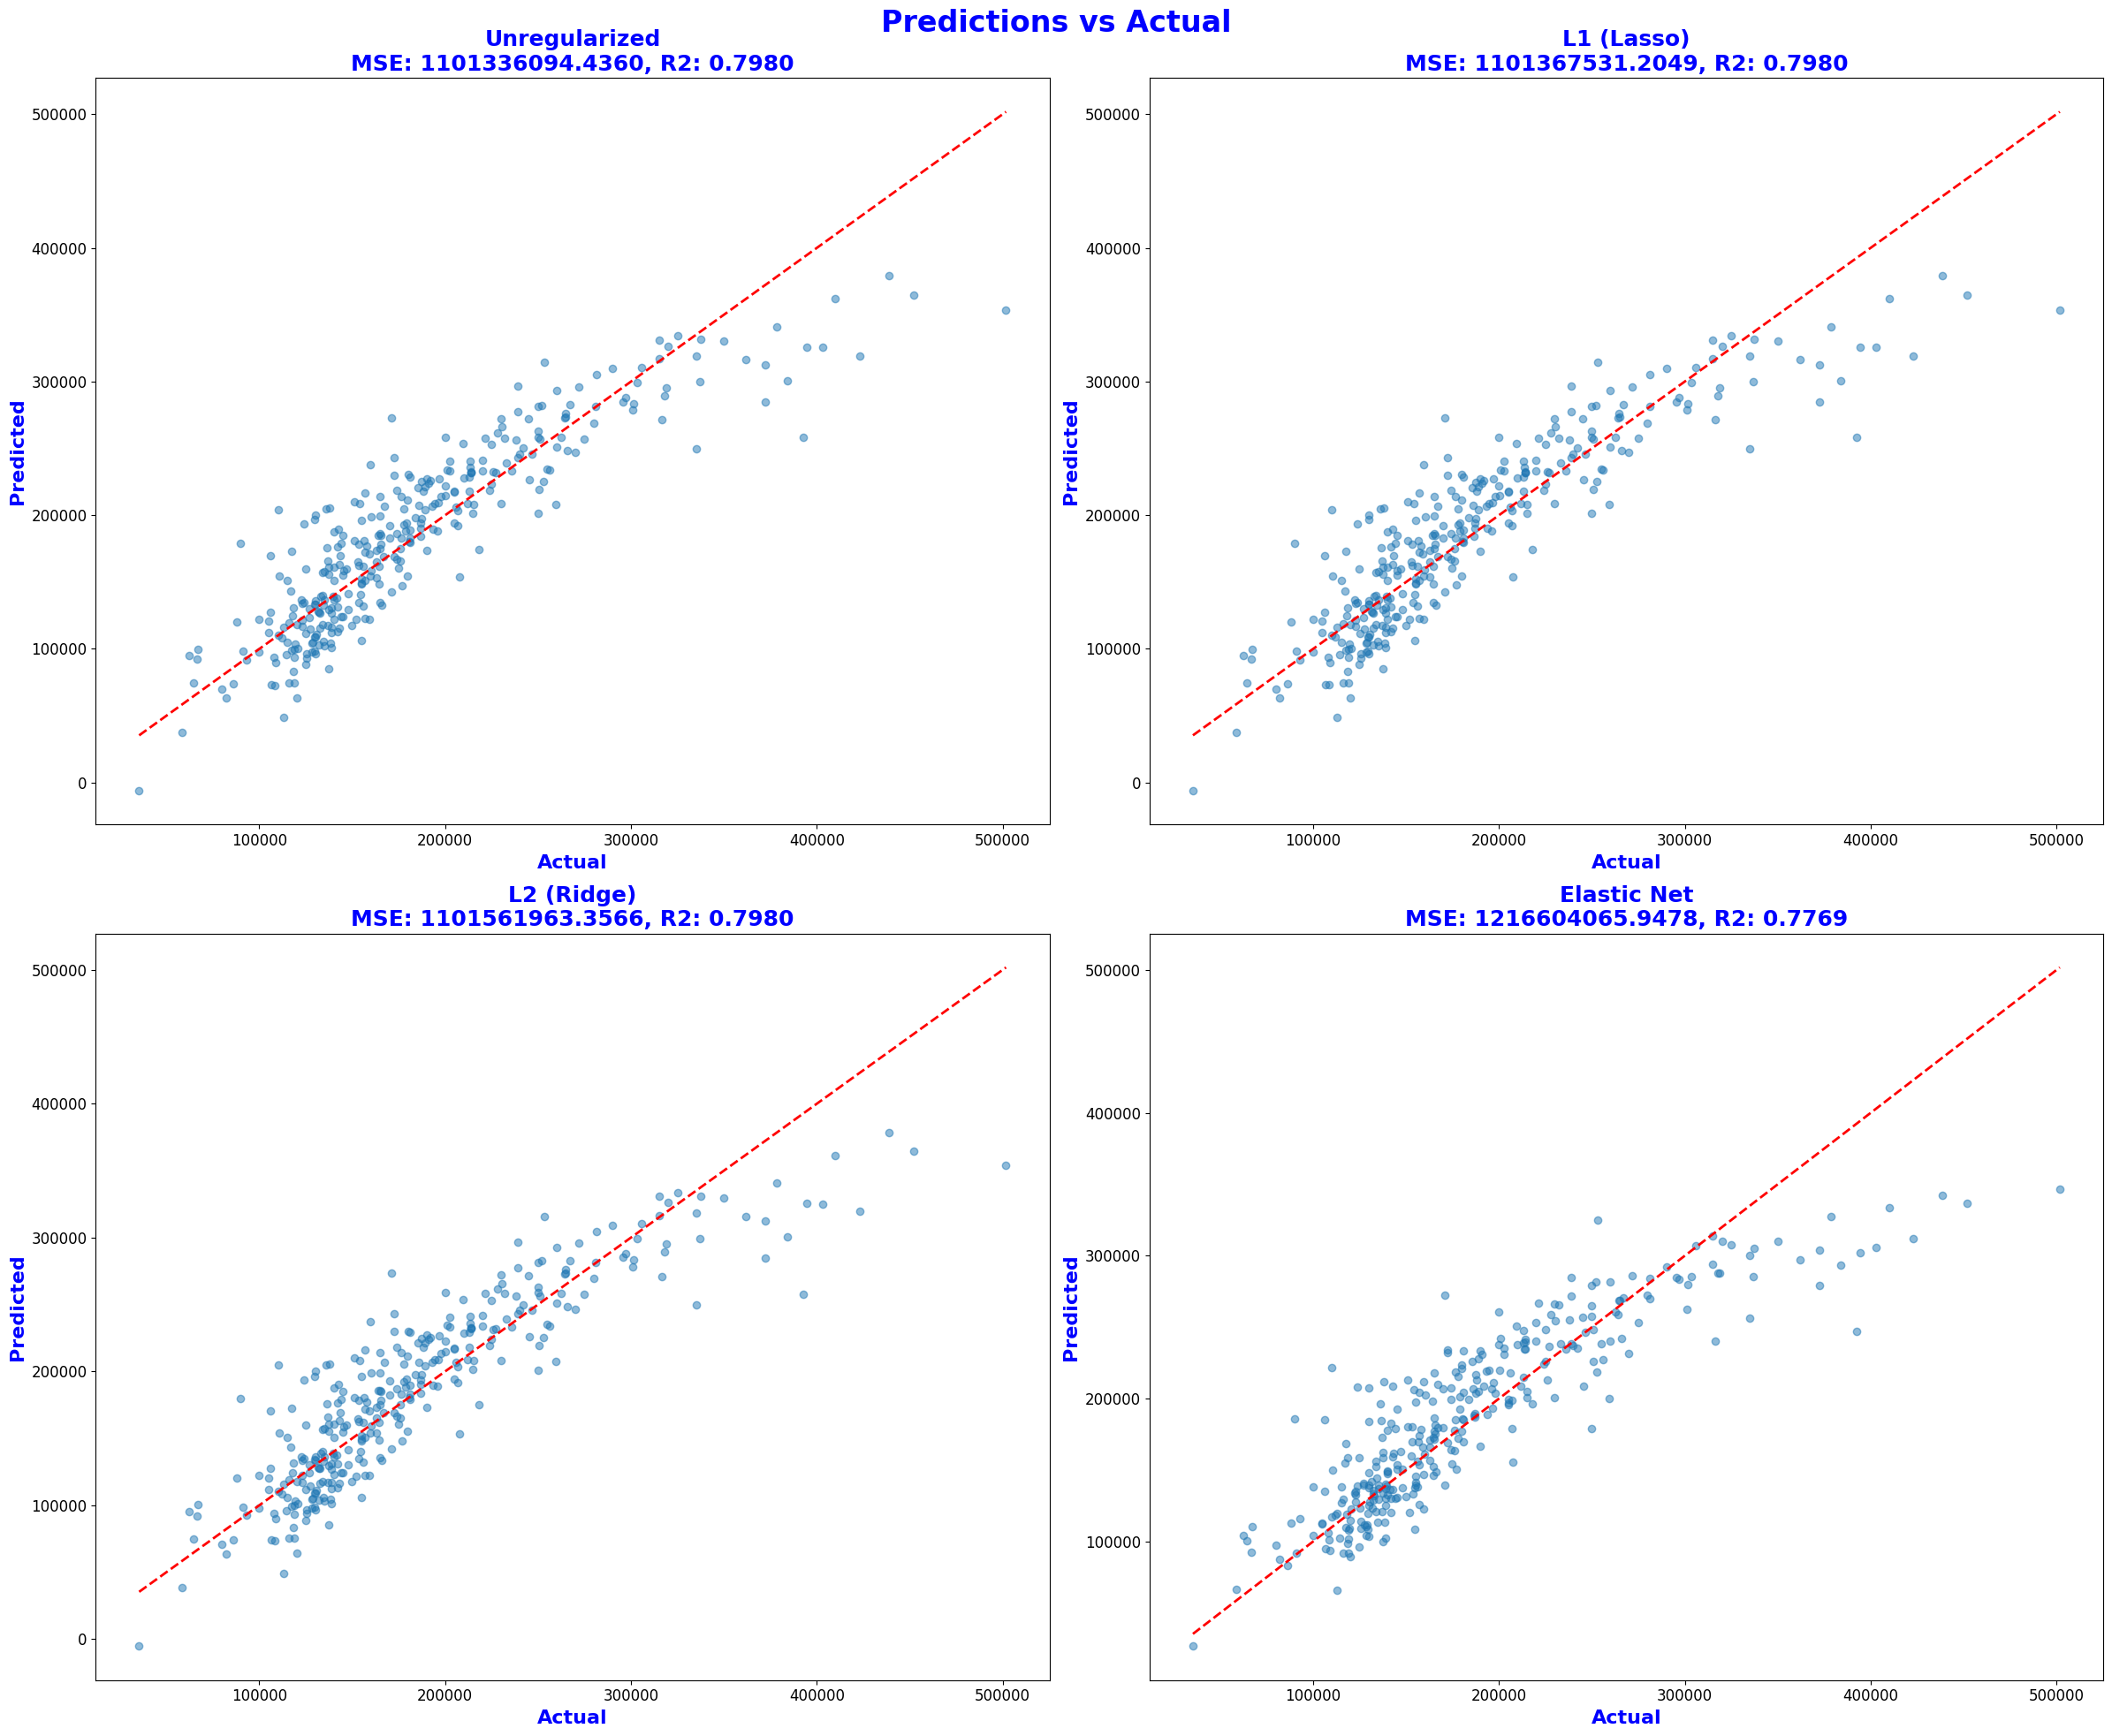

In [9]:
# Plot predictions vs actual
fig, axes = plt.subplots(2, 2, figsize=(24, 20))
fig.suptitle('Predictions vs Actual', fontsize=24, color='Blue', fontweight='bold')

for ax, (name, result) in zip(axes.flatten(), results.items()):
    model = result['model']
    y_pred = model.predict(X_test_scaled)
    ax.scatter(y_test, y_pred, alpha=0.5)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    ax.set_xlabel('Actual', fontsize=16, color='Blue', fontweight='bold')
    ax.set_ylabel('Predicted', fontsize=16, color='Blue', fontweight='bold')
    ax.set_title(f'{name}\nMSE: {result["mse"]:.4f}, R2: {result["r2"]:.4f}', fontsize=18, color='Blue', fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()